In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn
from matplotlib.pyplot import *

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
def plot_spec(qobj,w):
    # load data
    al = (np.loadtxt(qobj.f['TT'].al)).T[1]
    n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
    rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[1]
    l, ml0 = np.loadtxt(qobj.f['TT'].ml[0],unpack=True,usecols=(0,1))
    l, gl0 = np.loadtxt(qobj.f['TT'].cl[0],unpack=True,usecols=(0,1))
    l, gl1 = np.loadtxt(qobj.f['TT'].cl[1],unpack=True,usecols=(0,1))
    # plot unbinned spectra
    #pl.plot_1dstyle(fsize=[10,4],ylog=True,xmin=2,xmax=2048,ymin=1e-6,ymax=5e-5)
    #plot(gl0/w[4])
    #plot(gl1/w[4])
    #axvline(50,color='k',ls='--')
    #show()
    #clf()
    # binning 
    mb = bn.multipole_binning(20,lmin=50,lmax=2048)
    vl = n0/np.sqrt(l+1e-30)
    nb = bn.binning(n0,mb,vl=vl)
    rb = bn.binning(rd,mb,vl=vl)
    bg0 = bn.binning1(gl0,mb)
    bg1 = bn.binning1(gl1,mb)
    mkk, vkk, skk, okk = bn.binned_spec(mb,qobj.f['TT'].cl[:101],cn=1,doreal=True,opt=True,vl=vl)
    # plot binned spectra
    pl.plot_1dstyle(fsize=[10,4],ylog=True,xmin=2,xmax=2048,ymin=1e-9,ymax=1e-4)
    plot(ml0/w[4],label='mean-field')
    plot(n0/w[4],label='N0')
    plot(rd/w[4],label='RDN0')
    plot(n0/w[4]/100.)
    errorbar(mb.bc,(okk-rb-nb/100.-mkk+nb+nb/99.)/w[4],yerr=vkk/w[4],fmt='o',label='debiased spec')
    plot(al,label='coadd normalization')
    legend()
    show()
    clf()

In [3]:
qids = ['boss_01','boss_02','boss_03','boss_04','dn']
dirs = local.data_directory()
qobj = {}
for q in qids:
    aobj = local.init_analysis_params(qid='diff_'+q,ascale=5.)
    qobj[q] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])

In [4]:
w = tools_cmb.wfactors(qids)

wfactors: [0.03542596 0.01231073 0.00365657 0.00110842 0.00034184]
wfactors: [0.04727557 0.02063321 0.01033383 0.00532094 0.00281209]
wfactors: [0.04739993 0.02116767 0.01080148 0.00561267 0.00295987]
wfactors: [0.04741924 0.01886579 0.00859986 0.00400251 0.00189621]
wfactors: [0.04739993 0.02116767 0.01080148 0.00561267 0.00295987]


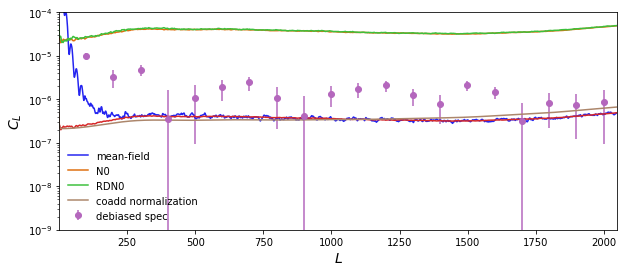

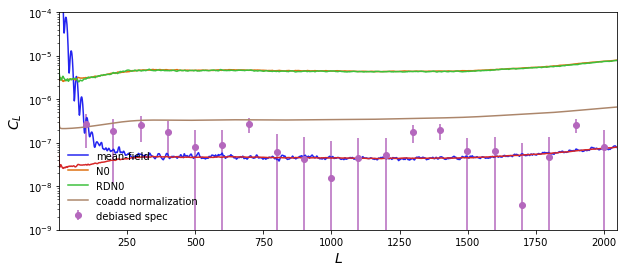

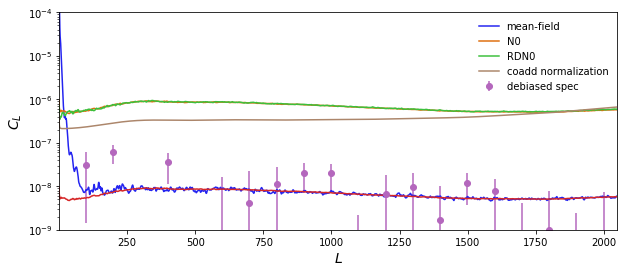

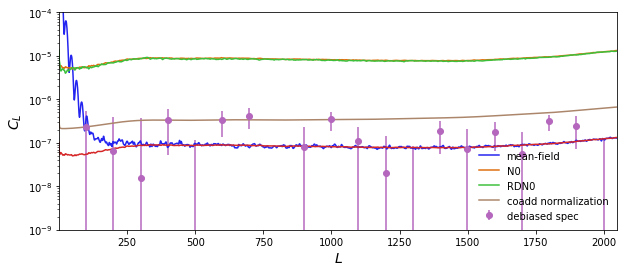

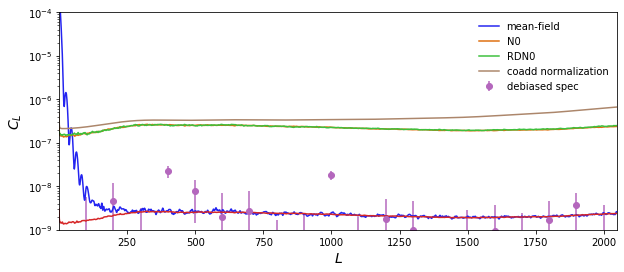

<Figure size 720x288 with 0 Axes>

In [5]:
for q in qids:
    plot_spec(qobj[q],w[q])